Reference: https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems

In [1]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.draw()

┌───┐
q: ┤ X ├
   └───┘

In [2]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.y(0)
circuit.draw()

┌───┐
q: ┤ Y ├
   └───┘

In [3]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.z(0)
circuit.draw()

┌───┐
q: ┤ Z ├
   └───┘

In [4]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.s(0)
circuit.draw()

┌───┐
q: ┤ S ├
   └───┘

In [5]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.ss(0)
circuit.draw()

AttributeError: 'QuantumCircuit' object has no attribute 'ss'

In [6]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.y(0)
circuit.draw()

┌───┐┌───┐
q: ┤ X ├┤ Y ├
   └───┘└───┘

In [7]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

### If we wish to choose our own name we can do this using the QuantumRegister class like this:

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

In [10]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)

circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw())

┌───┐┌───┐┌───┐┌───┐
X: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

## 1. Program to create  a new circuit with two new qubits, then displays the circuit's qubits attribute.

In [13]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.qubits

[Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]

In [14]:
qc.x(0)  # Add X-gate to qubit 0
qc.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=())]

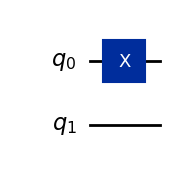

In [15]:
qc.draw("mpl")

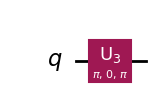

In [16]:
# Draw definition circuit of 0th instruction in `qc`
qc.data[0].operation.definition.draw("mpl")

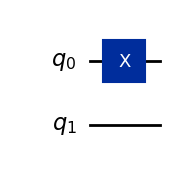

In [31]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.x(0)  # Add X-gate to qubit 0
qc.draw("mpl")

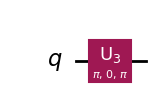

In [32]:
# Draw definition circuit of 0th instruction in `qc`
qc.data[0].operation.definition.draw("mpl")

## 2. Build circuits

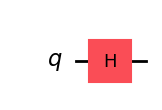

In [17]:
from qiskit.circuit.library import HGate
 
qc = QuantumCircuit(1)
qc.append(
    HGate(),  # New HGate instruction
    [0]       # Apply to qubit 0
)
qc.draw("mpl")

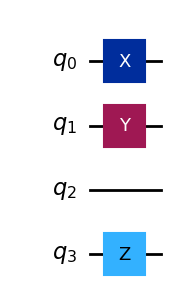

In [18]:
qc_a = QuantumCircuit(4)
qc_a.x(0)
 
qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)
 
# compose qubits (0, 1) of qc_a to qubits (1, 3) of qc_b respectively
combined = qc_a.compose(qc_b, qubits=[1, 3])
combined.draw("mpl")

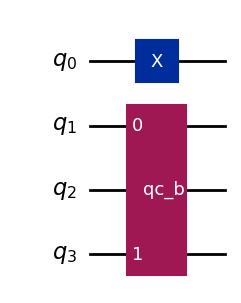

In [19]:
inst = qc_b.to_instruction()
qc_a.append(inst, [1, 3])
qc_a.draw("mpl")

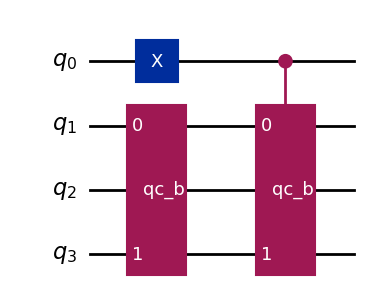

In [20]:
gate = qc_b.to_gate().control()
qc_a.append(gate, [0, 1, 3])
qc_a.draw("mpl")

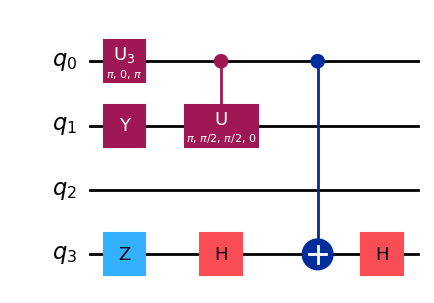

In [21]:
qc_a.decompose().draw("mpl")

### Example : Circuit with Hadmard and Control Gate

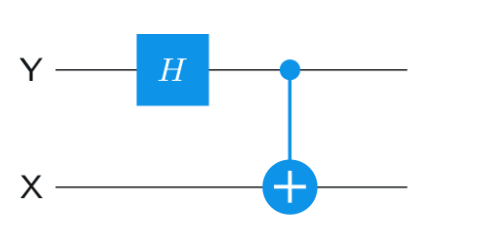

In [12]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw())

┌───┐     ┌─┐   
  Y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  X: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
B: 1/═══════════╩══╬═
                0  ║ 
A: 1/══════════════╩═
                   0

## Basic Quantum Circuits

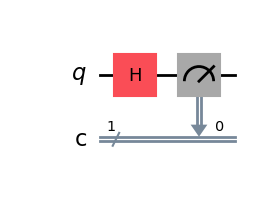

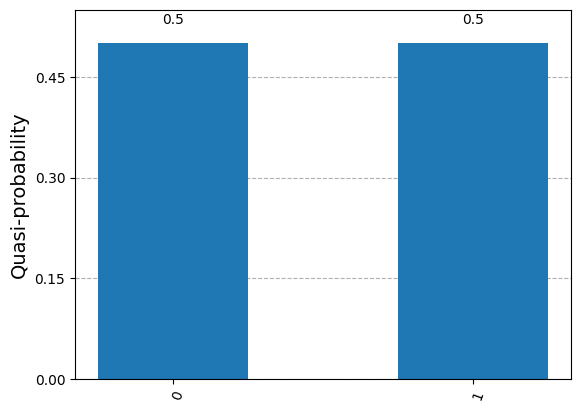

In [34]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, circuit_drawer
from IPython.display import Image

# Create Quantum and Classical Registers
qreg = QuantumRegister(1, 'q')  # 1 qubit
creg = ClassicalRegister(1, 'c')  # 1 classical bit for measurement
qc = QuantumCircuit(qreg, creg)

# Apply Hadamard gate to the qubit to create a superposition
qc.h(qreg[0])

# Measure the qubit
qc.measure(qreg[0], creg[0])

# Save and display the circuit visualization
circuit_image = circuit_drawer(qc, output='mpl')
circuit_image.savefig('basic_quantum_circuit.png')
display(Image(filename='basic_quantum_circuit.png'))

# Simulate the circuit and plot the measurement result
sampler = Sampler()
job = sampler.run(circuits=qc)
result = job.result()
counts = result.quasi_dists[0]
plot_histogram(counts)


## Basic Bell State Circuit 

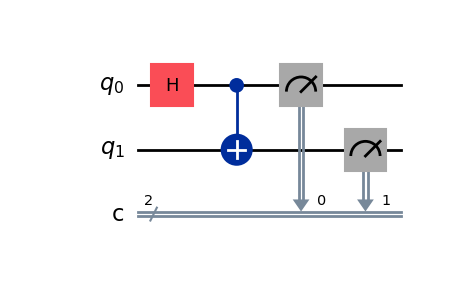

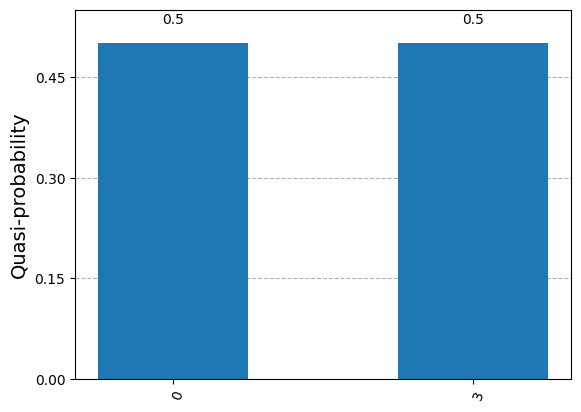

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, circuit_drawer
from IPython.display import Image

# Quantum and Classical Registers
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg, creg)

# Circuit: Create Bell State
qc.h(qreg[0])  # Hadamard on q0
qc.cx(qreg[0], qreg[1])  # CNOT on q1 with q0 as control

# Measurement
qc.measure(qreg, creg)

# Save and display the circuit visualization
circuit_image = circuit_drawer(qc, output='mpl')
circuit_image.savefig('bell_state_circuit.png')
display(Image(filename='bell_state_circuit.png'))

# Simulate and Plot
sampler = Sampler()
job = sampler.run(circuits=qc)
result = job.result()
counts = result.quasi_dists[0]
plot_histogram(counts)


### 2. Superposition and Measurement Circuit

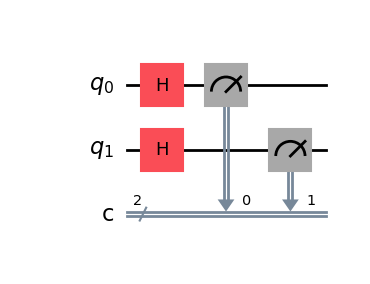

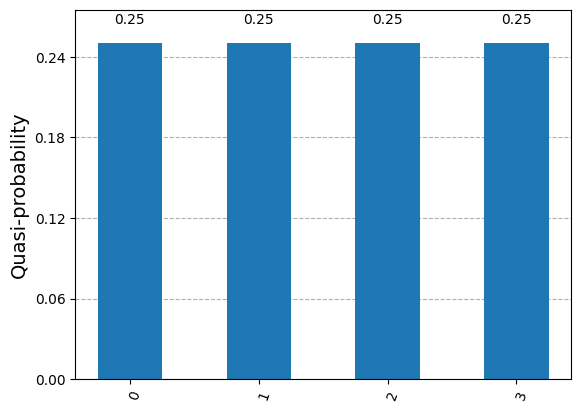

In [24]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, circuit_drawer
from IPython.display import Image

# Quantum and Classical Registers
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg, creg)

# Circuit: Create Superposition
qc.h(qreg[0])  # Hadamard on q0
qc.h(qreg[1])  # Hadamard on q1

# Measurement
qc.measure(qreg, creg)

# Save and display the circuit visualization
circuit_image = circuit_drawer(qc, output='mpl')
circuit_image.savefig('superposition_circuit.png')
display(Image(filename='superposition_circuit.png'))

# Simulate and Plot
sampler = Sampler()
job = sampler.run(circuits=qc)
result = job.result()
counts = result.quasi_dists[0]
plot_histogram(counts)


## 5. Toffoli Gate Circuit (CCX Gate)

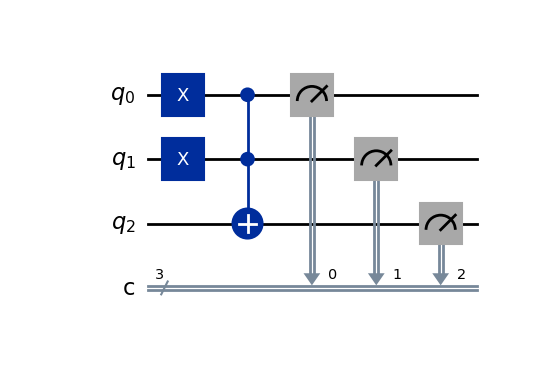

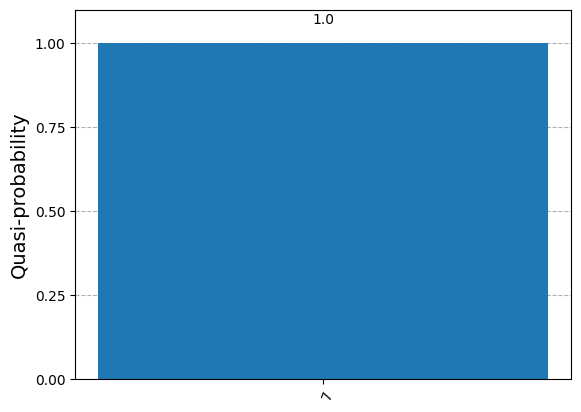

In [27]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, circuit_drawer
from IPython.display import Image

# Quantum and Classical Registers
qreg = QuantumRegister(3, 'q')
creg = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qreg, creg)

# Circuit: Toffoli Gate
qc.x(qreg[0])  # Set q0 = 1
qc.x(qreg[1])  # Set q1 = 1
qc.ccx(qreg[0], qreg[1], qreg[2])  # Toffoli gate on q2 with q0 and q1 as controls

# Measurement
qc.measure(qreg, creg)

# Save and display the circuit visualization
circuit_image = circuit_drawer(qc, output='mpl')
circuit_image.savefig('toffoli_gate_circuit.png')
display(Image(filename='toffoli_gate_circuit.png'))

# Simulate and Plot
sampler = Sampler()
job = sampler.run(circuits=qc)
result = job.result()
counts = result.quasi_dists[0]
plot_histogram(counts)

### 3. Quantum Fourier Transform (QFT) Circuit

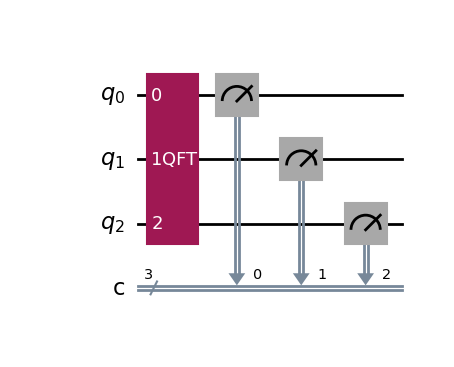

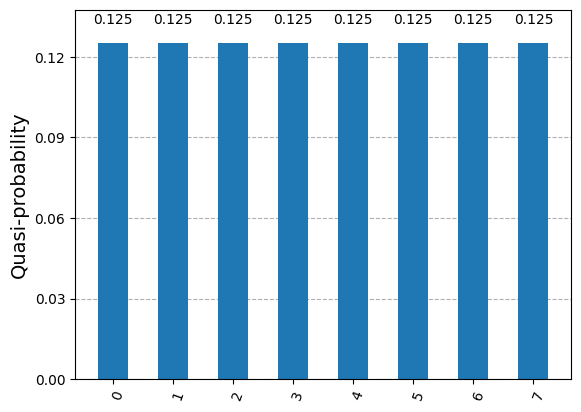

In [25]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.circuit.library import QFT
from IPython.display import Image

# Quantum and Classical Registers
qreg = QuantumRegister(3, 'q')
creg = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qreg, creg)

# Circuit: Apply QFT
qc.append(QFT(3), qreg)

# Measurement
qc.measure(qreg, creg)

# Save and display the circuit visualization
circuit_image = circuit_drawer(qc, output='mpl')
circuit_image.savefig('qft_circuit.png')
display(Image(filename='qft_circuit.png'))

# Simulate and Plot
sampler = Sampler()
job = sampler.run(circuits=qc)
result = job.result()
counts = result.quasi_dists[0]
plot_histogram(counts)


### 4. Grover's Algorithm Circuit

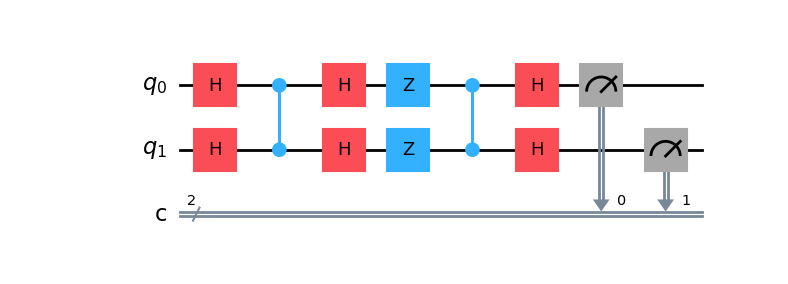

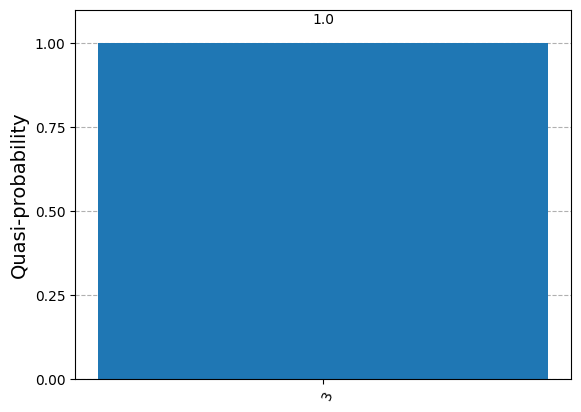

In [28]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, circuit_drawer
from IPython.display import Image

# Quantum and Classical Registers
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qreg, creg)

# Initialize Superposition
qc.h(qreg[0])
qc.h(qreg[1])

# Oracle for |11>
qc.cz(qreg[0], qreg[1])

# Grover Diffusion Operator
qc.h(qreg[0])
qc.h(qreg[1])
qc.z(qreg[0])
qc.z(qreg[1])
qc.cz(qreg[0], qreg[1])
qc.h(qreg[0])
qc.h(qreg[1])

# Measurement
qc.measure(qreg, creg)

# Save and display the circuit visualization
circuit_image = circuit_drawer(qc, output='mpl')
circuit_image.savefig('grovers_algorithm_circuit.png')
display(Image(filename='grovers_algorithm_circuit.png'))

# Simulate and Plot
sampler = Sampler()
job = sampler.run(circuits=qc)
result = job.result()
counts = result.quasi_dists[0]
plot_histogram(counts)


## Shor's Algorithm Circuit Example

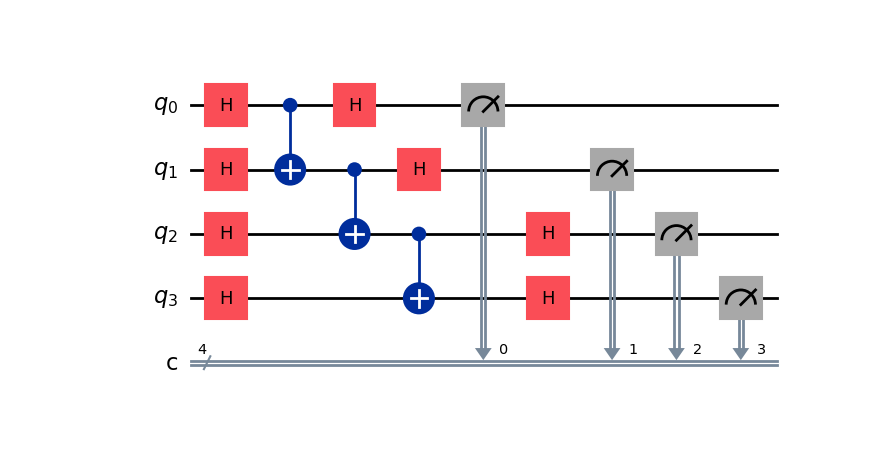

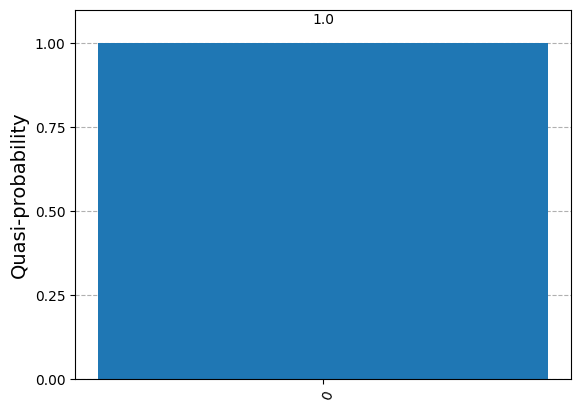

In [29]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram, circuit_drawer
from IPython.display import Image

# Quantum and Classical Registers
qreg = QuantumRegister(4, 'q')  # 4 qubits for quantum operations
creg = ClassicalRegister(4, 'c')  # 4 classical bits for measurement
qc = QuantumCircuit(qreg, creg)

# Quantum Fourier Transform (QFT) to initialize the superposition state
qc.h(qreg[0])
qc.h(qreg[1])
qc.h(qreg[2])
qc.h(qreg[3])

# Apply the controlled modular exponentiation (simplified example)
qc.cx(qreg[0], qreg[1])  # Controlled-NOT gate
qc.cx(qreg[1], qreg[2])  # Controlled-NOT gate
qc.cx(qreg[2], qreg[3])  # Controlled-NOT gate

# Inverse Quantum Fourier Transform (QFT)
qc.h(qreg[0])
qc.h(qreg[1])
qc.h(qreg[2])
qc.h(qreg[3])

# Measurement
qc.measure(qreg, creg)

# Save and display the circuit visualization
circuit_image = circuit_drawer(qc, output='mpl')
circuit_image.savefig('shors_algorithm_circuit.png')
display(Image(filename='shors_algorithm_circuit.png'))

# Simulate and Plot
sampler = Sampler()
job = sampler.run(circuits=qc)
result = job.result()
counts = result.quasi_dists[0]
plot_histogram(counts)
